**Sirlene Andreis**

[Github](https://github.com/AndreisSirlene)
[Linkedin](https://www.linkedin.com/in/sirlene-andreis/)


 # Mechanisms of Action (MoA) Prediction
 
 * The importance of the Mechanism of Action (MoA) of a drug

In the past, scientists derived drugs from natural products or were inspired by traditional remedies. Very common drugs, such as paracetamol, known in the US as acetaminophen, were put into clinical use decades before the biological mechanisms driving their pharmacological activities were understood. Today, with the advent of more powerful technologies, drug discovery has changed from the serendipitous approaches of the past to a more targeted model based on an understanding of the underlying biological mechanism of a disease. In this new framework, scientists seek to identify a protein target associated with a disease and develop a molecule that can modulate that protein target. As a shorthand to describe the biological activity of a given molecule, scientists assign a label referred to as mechanism-of-action or MoA for short.

By treat a sample of human cells with the drug and then analyze the cellular responses with algorithms that search for similarity to known patterns in large genomic databases, such as libraries of gene expression or cell viability patterns of drugs with known MoAs.

This dataset combines gene expression and cell viability data. It is based on a new technology that measures simultaneously (within the same samples) human cells’ responses to drugs in a pool of 100 different cell types (thus solving the problem of identifying ex-ante, which cell types are better suited for a given drug). In addition, shows the MoA annotations for more than 5,000 drugs.


Reference [Kaggle] (https://www.kaggle.com/c/lish-moa)

The dataset is  compost of embrionary cells experiments, each line represent one experiment id, submitted to a type of treatment, a specific time of observation, the number of dosage, a drug exposure or not, and consequences of the experiments.

## Importing libraries, read and load Dataframe

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Set plot style 
plt.style.use('seaborn')
sns.set_style('whitegrid')
sns.set(font_scale = 1.2)
url='https://github.com/AndreisSirlene/Data-Immersion/blob/main/dados_experimentos.zip?raw=true'

#read the url and unziped
data = pd.read_csv(url, compression='zip')

pd.set_option('display.max.columns', None)
#display the 5 first rows of the dataset
data.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,g-40,g-41,g-42,g-43,g-44,g-45,g-46,g-47,g-48,g-49,g-50,g-51,g-52,g-53,g-54,g-55,g-56,g-57,g-58,g-59,g-60,g-61,g-62,g-63,g-64,g-65,g-66,g-67,g-68,g-69,g-70,g-71,g-72,g-73,g-74,g-75,g-76,g-77,g-78,g-79,g-80,g-81,g-82,g-83,g-84,g-85,g-86,g-87,g-88,g-89,g-90,g-91,g-92,g-93,g-94,g-95,g-96,g-97,g-98,g-99,g-100,g-101,g-102,g-103,g-104,g-105,g-106,g-107,g-108,g-109,g-110,g-111,g-112,g-113,g-114,g-115,g-116,g-117,g-118,g-119,g-120,g-121,g-122,g-123,g-124,g-125,g-126,g-127,g-128,g-129,g-130,g-131,g-132,g-133,g-134,g-135,g-136,g-137,g-138,g-139,g-140,g-141,g-142,g-143,g-144,g-145,g-146,g-147,g-148,g-149,g-150,g-151,g-152,g-153,g-154,g-155,g-156,g-157,g-158,g-159,g-160,g-161,g-162,g-163,g-164,g-165,g-166,g-167,g-168,g-169,g-170,g-171,g-172,g-173,g-174,g-175,g-176,g-177,g-178,g-179,g-180,g-181,g-182,g-183,g-184,g-185,g-186,g-187,g-188,g-189,g-190,g-191,g-192,g-193,g-194,g-195,g-196,g-197,g-198,g-199,g-200,g-201,g-202,g-203,g-204,g-205,g-206,g-207,g-208,g-209,g-210,g-211,g-212,g-213,g-214,g-215,g-216,g-217,g-218,g-219,g-220,g-221,g-222,g-223,g-224,g-225,g-226,g-227,g-228,g-229,g-230,g-231,g-232,g-233,g-234,g-235,g-236,g-237,g-238,g-239,g-240,g-241,g-242,g-243,g-244,g-245,g-246,g-247,g-248,g-249,g-250,g-251,g-252,g-253,g-254,g-255,g-256,g-257,g-258,g-259,g-260,g-261,g-262,g-263,g-264,g-265,g-266,g-267,g-268,g-269,g-270,g-271,g-272,g-273,g-274,g-275,g-276,g-277,g-278,g-279,g-280,g-281,g-282,g-283,g-284,g-285,g-286,g-287,g-288,g-289,g-290,g-291,g-292,g-293,g-294,g-295,g-296,g-297,g-298,g-299,g-300,g-301,g-302,g-303,g-304,g-305,g-306,g-307,g-308,g-309,g-310,g-311,g-312,g-313,g-314,g-315,g-316,g-317,g-318,g-319,g-320,g-321,g-322,g-323,g-324,g-325,g-326,g-327,g-328,g-329,g-330,g-331,g-332,g-333,g-334,g-335,g-336,g-337,g-338,g-339,g-340,g-341,g-342,g-343,g-344,g-345,g-346,g-347,g-348,g-349,g-350,g-351,g-352,g-353,g-354,g-355,g-356,g-357,g-358,g-359,g-360,g-361,g-362,g-363,g-364,g-365,g-366,g-367,g-368,g-369,g-370,g-371,g-372,g-373,g-374,g-375,g-376,g-377,g-378,g-379,g-380,g-381,g-382,g-383,g-384,g-385,g-386,g-387,g-388,g-389,g-390,g-391,g-392,g-393,g-394,g-395,g-396,g-397,g-398,g-399,g-400,g-401,g-402,g-403,g-404,g-405,g-406,g-407,g-408,g-409,g-410,g-411,g-412,g-413,g-414,g-415,g-416,g-417,g-418,g-419,g-420,g-421,g-422,g-423,g-424,g-425,g-426,g-427,g-428,g-429,g-430,g-431,g-432,g-433,g-434,g-435,g-436,g-437,g-438,g-439,g-440,g-441,g-442,g-443,g-444,g-445,g-446,g-447,g-448,g-449,g-450,g-451,g-452,g-453,g-454,g-455,g-456,g-457,g-458,g-459,g-460,g-461,g-462,g-463,g-464,g-465,g-466,g-467,g-468,g-469,g-470,g-471,g-472,g-473,g-474,g-475,g-476,g-477,g-478,g-479,g-480,g-481,g-482,g-483,g-484,g-485,g-486,g-487,g-488,g-489,g-490,g-491,g-492,g-493,g-494,g-495,g-496,g-497,g-498,g-499,g-500,g-501,g-502,g-503,g-504,g-505,g-506,g-507,g-508,g-509,g-510,g-511,g-512,g-513,g-514,g-515,g-516,g-517,g-518,g-519,g-520,g-521,g-522,g-523,g-524,g-525,g-526,g-527,g-528,g-529,g-530,g-531,g-532,g-533,g-534,g-535,g-536,g-537,g-538,g-539,g-540,g-541,g-542,g-543,g-544,g-545,g-546,g-547,g-548,g-549,g-550,g-551,g-552,g-553,g-554,g-555,g-556,g-557,g-558,g-559,g-560,g-561,g-562,g-563,g-564,g-565,g-566,g-567,g-568,g-569,g-570,g-571,g-572,g-573,g-574,g-575,g-576,g-577,g-578,g-579,g-580,g-581,g-582,g-583,g-584,g-585,g-586,g-587,g-588,g-589,g-590,g-591,g-592,g-593,g-594,g-595,g-596,g-597,g-598,g-599,g-600,g-601,g-602,g-603,g-604,g-605,g-606,g-607,g-608,g-609,g-610,g-611,g-612,g-613,g-614,g-615,g-616,g-617,g-618,g-619,g-620,g-621,g-622,g-623,g-624,g-625,g-626,g-627,g-628,g-629,g-630,g-631,g-632,g-633,g-634,g-635,g-636,g-637,g-638,g-639,g-640,g-641,g-642,g-643,g-644,g-645,g-646,g-647,g-648,g-649,g-650,g-651,g-652,g-653,g-654,g-655,g-656,g-657,g-658,g-659,g-660,g-661,g-662,g-663,g-664,g-665,g-666,g-667,g-668,g-669,g-670,g-671,g-672,g-673,g-674,g-675,g-676,g-677,g-678,g-67

In [2]:
#display the last 5 rows of the dataset
data.tail()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,g-40,g-41,g-42,g-43,g-44,g-45,g-46,g-47,g-48,g-49,g-50,g-51,g-52,g-53,g-54,g-55,g-56,g-57,g-58,g-59,g-60,g-61,g-62,g-63,g-64,g-65,g-66,g-67,g-68,g-69,g-70,g-71,g-72,g-73,g-74,g-75,g-76,g-77,g-78,g-79,g-80,g-81,g-82,g-83,g-84,g-85,g-86,g-87,g-88,g-89,g-90,g-91,g-92,g-93,g-94,g-95,g-96,g-97,g-98,g-99,g-100,g-101,g-102,g-103,g-104,g-105,g-106,g-107,g-108,g-109,g-110,g-111,g-112,g-113,g-114,g-115,g-116,g-117,g-118,g-119,g-120,g-121,g-122,g-123,g-124,g-125,g-126,g-127,g-128,g-129,g-130,g-131,g-132,g-133,g-134,g-135,g-136,g-137,g-138,g-139,g-140,g-141,g-142,g-143,g-144,g-145,g-146,g-147,g-148,g-149,g-150,g-151,g-152,g-153,g-154,g-155,g-156,g-157,g-158,g-159,g-160,g-161,g-162,g-163,g-164,g-165,g-166,g-167,g-168,g-169,g-170,g-171,g-172,g-173,g-174,g-175,g-176,g-177,g-178,g-179,g-180,g-181,g-182,g-183,g-184,g-185,g-186,g-187,g-188,g-189,g-190,g-191,g-192,g-193,g-194,g-195,g-196,g-197,g-198,g-199,g-200,g-201,g-202,g-203,g-204,g-205,g-206,g-207,g-208,g-209,g-210,g-211,g-212,g-213,g-214,g-215,g-216,g-217,g-218,g-219,g-220,g-221,g-222,g-223,g-224,g-225,g-226,g-227,g-228,g-229,g-230,g-231,g-232,g-233,g-234,g-235,g-236,g-237,g-238,g-239,g-240,g-241,g-242,g-243,g-244,g-245,g-246,g-247,g-248,g-249,g-250,g-251,g-252,g-253,g-254,g-255,g-256,g-257,g-258,g-259,g-260,g-261,g-262,g-263,g-264,g-265,g-266,g-267,g-268,g-269,g-270,g-271,g-272,g-273,g-274,g-275,g-276,g-277,g-278,g-279,g-280,g-281,g-282,g-283,g-284,g-285,g-286,g-287,g-288,g-289,g-290,g-291,g-292,g-293,g-294,g-295,g-296,g-297,g-298,g-299,g-300,g-301,g-302,g-303,g-304,g-305,g-306,g-307,g-308,g-309,g-310,g-311,g-312,g-313,g-314,g-315,g-316,g-317,g-318,g-319,g-320,g-321,g-322,g-323,g-324,g-325,g-326,g-327,g-328,g-329,g-330,g-331,g-332,g-333,g-334,g-335,g-336,g-337,g-338,g-339,g-340,g-341,g-342,g-343,g-344,g-345,g-346,g-347,g-348,g-349,g-350,g-351,g-352,g-353,g-354,g-355,g-356,g-357,g-358,g-359,g-360,g-361,g-362,g-363,g-364,g-365,g-366,g-367,g-368,g-369,g-370,g-371,g-372,g-373,g-374,g-375,g-376,g-377,g-378,g-379,g-380,g-381,g-382,g-383,g-384,g-385,g-386,g-387,g-388,g-389,g-390,g-391,g-392,g-393,g-394,g-395,g-396,g-397,g-398,g-399,g-400,g-401,g-402,g-403,g-404,g-405,g-406,g-407,g-408,g-409,g-410,g-411,g-412,g-413,g-414,g-415,g-416,g-417,g-418,g-419,g-420,g-421,g-422,g-423,g-424,g-425,g-426,g-427,g-428,g-429,g-430,g-431,g-432,g-433,g-434,g-435,g-436,g-437,g-438,g-439,g-440,g-441,g-442,g-443,g-444,g-445,g-446,g-447,g-448,g-449,g-450,g-451,g-452,g-453,g-454,g-455,g-456,g-457,g-458,g-459,g-460,g-461,g-462,g-463,g-464,g-465,g-466,g-467,g-468,g-469,g-470,g-471,g-472,g-473,g-474,g-475,g-476,g-477,g-478,g-479,g-480,g-481,g-482,g-483,g-484,g-485,g-486,g-487,g-488,g-489,g-490,g-491,g-492,g-493,g-494,g-495,g-496,g-497,g-498,g-499,g-500,g-501,g-502,g-503,g-504,g-505,g-506,g-507,g-508,g-509,g-510,g-511,g-512,g-513,g-514,g-515,g-516,g-517,g-518,g-519,g-520,g-521,g-522,g-523,g-524,g-525,g-526,g-527,g-528,g-529,g-530,g-531,g-532,g-533,g-534,g-535,g-536,g-537,g-538,g-539,g-540,g-541,g-542,g-543,g-544,g-545,g-546,g-547,g-548,g-549,g-550,g-551,g-552,g-553,g-554,g-555,g-556,g-557,g-558,g-559,g-560,g-561,g-562,g-563,g-564,g-565,g-566,g-567,g-568,g-569,g-570,g-571,g-572,g-573,g-574,g-575,g-576,g-577,g-578,g-579,g-580,g-581,g-582,g-583,g-584,g-585,g-586,g-587,g-588,g-589,g-590,g-591,g-592,g-593,g-594,g-595,g-596,g-597,g-598,g-599,g-600,g-601,g-602,g-603,g-604,g-605,g-606,g-607,g-608,g-609,g-610,g-611,g-612,g-613,g-614,g-615,g-616,g-617,g-618,g-619,g-620,g-621,g-622,g-623,g-624,g-625,g-626,g-627,g-628,g-629,g-630,g-631,g-632,g-633,g-634,g-635,g-636,g-637,g-638,g-639,g-640,g-641,g-642,g-643,g-644,g-645,g-646,g-647,g-648,g-649,g-650,g-651,g-652,g-653,g-654,g-655,g-656,g-657,g-658,g-659,g-660,g-661,g-662,g-663,g-664,g-665,g-666,g-667,g-668,g-669,g-670,g-671,g-672,g-673,g-674,g-675,g-676,g-677,g-678,g-67

### Data Exploration

In [3]:
# identify the size of the DataFrame
data.shape

(23814, 877)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 877 entries, id to c-99
dtypes: float64(872), int64(1), object(4)
memory usage: 159.3+ MB


In [5]:
#Rename the columns names to English
data.rename(columns={'tratamento': 'treatment', 'tempo': 'time', 'dose': 'dosage', 'droga': 'drug'}, inplace=True)

In [6]:
#replace the '-' from column names in order to be able to query it
for column in data.columns:
    new_name = column.replace('-', '')
    data.rename(columns={column:new_name}, inplace=True)
    
data.head()

,id,treatment,time,dosage,drug,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,g37,g38,g39,g40,g41,g42,g43,g44,g45,g46,g47,g48,g49,g50,g51,g52,g53,g54,g55,g56,g57,g58,g59,g60,g61,g62,g63,g64,g65,g66,g67,g68,g69,g70,g71,g72,g73,g74,g75,g76,g77,g78,g79,g80,g81,g82,g83,g84,g85,g86,g87,g88,g89,g90,g91,g92,g93,g94,g95,g96,g97,g98,g99,g100,g101,g102,g103,g104,g105,g106,g107,g108,g109,g110,g111,g112,g113,g114,g115,g116,g117,g118,g119,g120,g121,g122,g123,g124,g125,g126,g127,g128,g129,g130,g131,g132,g133,g134,g135,g136,g137,g138,g139,g140,g141,g142,g143,g144,g145,g146,g147,g148,g149,g150,g151,g152,g153,g154,g155,g156,g157,g158,g159,g160,g161,g162,g163,g164,g165,g166,g167,g168,g169,g170,g171,g172,g173,g174,g175,g176,g177,g178,g179,g180,g181,g182,g183,g184,g185,g186,g187,g188,g189,g190,g191,g192,g193,g194,g195,g196,g197,g198,g199,g200,g201,g202,g203,g204,g205,g206,g207,g208,g209,g210,g211,g212,g213,g214,g215,g216,g217,g218,g219,g220,g221,g222,g223,g224,g225,g226,g227,g228,g229,g230,g231,g232,g233,g234,g235,g236,g237,g238,g239,g240,g241,g242,g243,g244,g245,g246,g247,g248,g249,g250,g251,g252,g253,g254,g255,g256,g257,g258,g259,g260,g261,g262,g263,g264,g265,g266,g267,g268,g269,g270,g271,g272,g273,g274,g275,g276,g277,g278,g279,g280,g281,g282,g283,g284,g285,g286,g287,g288,g289,g290,g291,g292,g293,g294,g295,g296,g297,g298,g299,g300,g301,g302,g303,g304,g305,g306,g307,g308,g309,g310,g311,g312,g313,g314,g315,g316,g317,g318,g319,g320,g321,g322,g323,g324,g325,g326,g327,g328,g329,g330,g331,g332,g333,g334,g335,g336,g337,g338,g339,g340,g341,g342,g343,g344,g345,g346,g347,g348,g349,g350,g351,g352,g353,g354,g355,g356,g357,g358,g359,g360,g361,g362,g363,g364,g365,g366,g367,g368,g369,g370,g371,g372,g373,g374,g375,g376,g377,g378,g379,g380,g381,g382,g383,g384,g385,g386,g387,g388,g389,g390,g391,g392,g393,g394,g395,g396,g397,g398,g399,g400,g401,g402,g403,g404,g405,g406,g407,g408,g409,g410,g411,g412,g413,g414,g415,g416,g417,g418,g419,g420,g421,g422,g423,g424,g425,g426,g427,g428,g429,g430,g431,g432,g433,g434,g435,g436,g437,g438,g439,g440,g441,g442,g443,g444,g445,g446,g447,g448,g449,g450,g451,g452,g453,g454,g455,g456,g457,g458,g459,g460,g461,g462,g463,g464,g465,g466,g467,g468,g469,g470,g471,g472,g473,g474,g475,g476,g477,g478,g479,g480,g481,g482,g483,g484,g485,g486,g487,g488,g489,g490,g491,g492,g493,g494,g495,g496,g497,g498,g499,g500,g501,g502,g503,g504,g505,g506,g507,g508,g509,g510,g511,g512,g513,g514,g515,g516,g517,g518,g519,g520,g521,g522,g523,g524,g525,g526,g527,g528,g529,g530,g531,g532,g533,g534,g535,g536,g537,g538,g539,g540,g541,g542,g543,g544,g545,g546,g547,g548,g549,g550,g551,g552,g553,g554,g555,g556,g557,g558,g559,g560,g561,g562,g563,g564,g565,g566,g567,g568,g569,g570,g571,g572,g573,g574,g575,g576,g577,g578,g579,g580,g581,g582,g583,g584,g585,g586,g587,g588,g589,g590,g591,g592,g593,g594,g595,g596,g597,g598,g599,g600,g601,g602,g603,g604,g605,g606,g607,g608,g609,g610,g611,g612,g613,g614,g615,g616,g617,g618,g619,g620,g621,g622,g623,g624,g625,g626,g627,g628,g629,g630,g631,g632,g633,g634,g635,g636,g637,g638,g639,g640,g641,g642,g643,g644,g645,g646,g647,g648,g649,g650,g651,g652,g653,g654,g655,g656,g657,g658,g659,g660,g661,g662,g663,g664,g665,g666,g667,g668,g669,g670,g671,g672,g673,g674,g675,g676,g677,g678,g679,g680,g681,g682,g683,g684,g685,g686,g687,g688,g689,g690,g691,g692,g693,g694,g695,g696,g697,g698,g699,g700,g701,g702,g703,g704,g705,g706,g707,g708,g709,g710,g711,g712,g713,g714,g715,g716,g717,g718,g719,g720,g721,g722,g723,g724,g725,g726,g727,g728,g729,g730,g731,g732,g733,g734,g735,g736,g737,g738,g739,g740,g741,g742,g743,g744,g745,g746,g747,g748,g749,g750,g751,g752,g753,g754,g755,g756,g757,g758,g759,g760,g761,g762,g763,g764,g765,g766,g767,g768,g769,g770,g771,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24,c25,c26,c27,c28,c29,c30,c31,c32,c33,c34,c35,c36,c37,c38,c39,c40,c41,c42,c43,c44,c45,c46,c47,c48,c49,c50,c51,c52,c53,c54,c55,c56,c

### Observe the feature Treatment

In [7]:
#Check the unique values for treatment
print('The treatment unique values are: \n',data['treatment'].unique())
print('***'*20)
#check the value distribution by category
print('The total value counts for treatment are: \n',data['treatment'].value_counts())
print('***'*20)
#Identify the proportion of the class treatment
print('The treatment proportion distribution is as follow: \n',data['treatment'].value_counts(normalize = True)* 100)

The treatment unique values are: 
 ['com_droga' 'com_controle']
************************************************************
The total value counts for treatment are: 
 com_droga       21948
com_controle     1866
Name: treatment, dtype: int64
************************************************************
The treatment proportion distribution is as follow: 
 com_droga       92.164273
com_controle     7.835727
Name: treatment, dtype: float64


### Observe the feature dosage

In [8]:
print('The dosage unique values are: \n',data['dosage'].unique())
print('***'*20)
print('The total value counts of dosage by category is: \n',data['dosage'].value_counts())
print('***'*20)
print('The percentage of dosage by category is: \n',data['dosage'].value_counts(normalize = True)* 100)

The dosage unique values are: 
 ['D1' 'D2']
************************************************************
The total value counts of dosage by category is: 
 D1    12147
D2    11667
Name: dosage, dtype: int64
************************************************************
The percentage of dosage by category is: 
 D1    51.007811
D2    48.992189
Name: dosage, dtype: float64


### Ploting Treatment and Dosage distribution

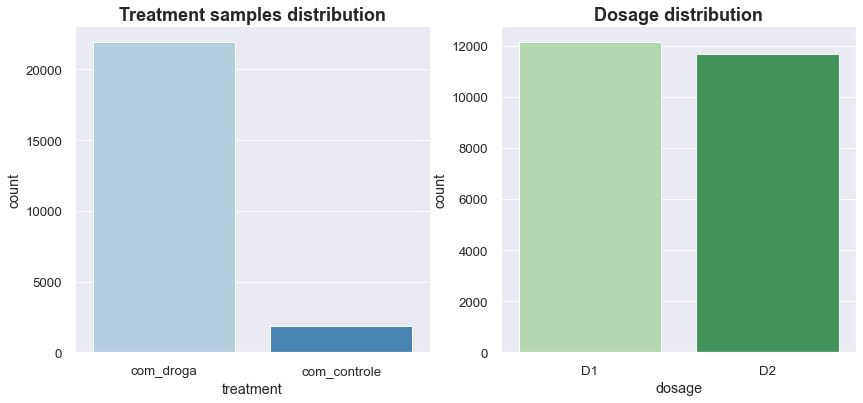

In [9]:
fig = plt.figure(figsize=(14,6))
#1 rows 2 cols
#first row, first col
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(x='treatment', data=data, palette='Blues')
plt.title('Treatment samples distribution', fontsize=18, weight='bold')
#first row sec col
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(x='dosage', data=data, palette='Greens')
plt.title('Dosage distribution',weight='bold', fontsize=18)
plt.show()

In [10]:
print('The time unique values are: \n', data['time'].unique())  # time of exposure until start the measurement
print('***'*20)
print('The time value counts are as follow: \n', data['time'].value_counts())
print('***'*20)
#Here we can identify a very balanced distribution of the time
print('The time percentage distribution is as follow: \n', data['time'].value_counts(normalize = True)* 100)

The time unique values are: 
 [24 72 48]
************************************************************
The time value counts are as follow: 
 48    8250
72    7792
24    7772
Name: time, dtype: int64
************************************************************
The time percentage distribution is as follow: 
 48    34.643487
72    32.720249
24    32.636264
Name: time, dtype: float64


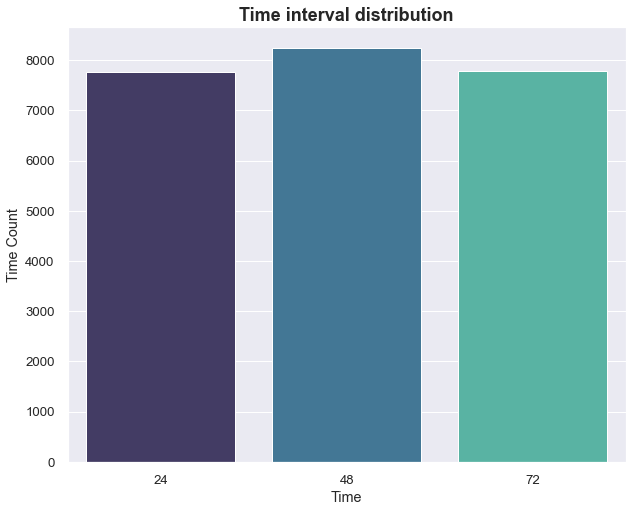

In [11]:
plt.figure(figsize=(10,8))
sns.countplot(data = data, x= 'time', palette= 'mako')
plt.title('Time interval distribution', fontsize=18, weight='bold')
plt.xlabel('Time')
plt.ylabel('Time Count')
plt.show();

### Understanding the drug feature


In [12]:
print('The drug unique values are: \n', data['drug'].unique())
print('***'* 20)
print('The number of drug investigated by the research was: ', data['drug'].nunique())
print('***'* 20)
print('The drug percentage distribution are: \n', data['drug'].value_counts(normalize = True) * 100)

The drug unique values are: 
 ['b68db1d53' 'df89a8e5a' '18bb41b2c' ... '573c787a2' 'b2fe3eca7'
 'dd4a96d16']
************************************************************
The number of drug investigated by the research was:  3289
************************************************************
The drug percentage distribution are: 
 cacb2b860    7.835727
87d714366    3.015033
9f80f3f77    1.033006
8b87a7a83    0.852440
5628cb3ee    0.848241
               ...   
5cc5a5a19    0.004199
3e7f719a5    0.004199
dac782c74    0.004199
f0d1b8dbc    0.004199
23d6790ad    0.004199
Name: drug, Length: 3289, dtype: float64


### First Insights

- Features g(0 to 771) represents gene expression data.

- Features c (0 to 99) represents cell viability data.
 
- Treatment indicates samples treated with drug and with controle. The control group does not have any intervention (like a test set in data science), while the drug group has received drug intervention and can be compared with the train set (where we can implement parameters to improve results and compare with test set).

_The reason for class treatment been unbalancead, can be by the fact that is a test set to compare the results obtain by the group that was submitted with drug manipulation._

- Time and dosage indicate treatment interval duration (24, 48, 72 hours) and dosage seems to be classified as (high or low).

- The total drugs tested are 3289.


In [13]:
control_treatment = data.query('treatment == "com_controle"')

control_drugs = control_treatment.drug
amount_of_control_experiments = len(control_drugs)

In [14]:
drugs_amount = len(data['drug'].unique()) - 1 
reason_drug_control = amount_of_control_experiments / drugs_amount

In [15]:
reason_drug_control

0.5675182481751825

In [16]:
#Looking for the 5 top drug frequence, filter only the code index
code_top5_drug = data['drug'].value_counts().index[:5]
code_top5_drug

Index(['cacb2b860', '87d714366', '9f80f3f77', '8b87a7a83', '5628cb3ee'], dtype='object')

In [17]:
top5_drugs = data.query('drug in @code_top5_drug')
top5_drugs

id     treatment  time dosage       drug      g0      g1  \
7      id_0020d0484     com_droga    48     D1  8b87a7a83  0.2711  0.5133   
16     id_002fb9c19     com_droga    48     D1  87d714366  8.7380  0.1914   
25     id_0054388ec  com_controle    48     D1  cacb2b860 -0.6696 -0.2718   
38     id_0079af0fb  com_controle    24     D1  cacb2b860 -0.1636 -1.8230   
40     id_007bfbb91  com_controle    24     D2  cacb2b860 -1.3200 -1.7340   
...             ...           ...   ...    ...        ...     ...     ...   
23793  id_ffd26f361  com_controle    48     D2  cacb2b860  0.6008  0.2781   
23802  id_fff3976bd     com_droga    24     D1  87d714366  3.2890  2.1270   
23805  id_fff6df1c5     com_droga    48     D2  5628cb3ee  1.7380 -1.2900   
23811  id_fffc1c3f4  com_controle    48     D2  cacb2b860  0.3942  0.3756   
23812  id_fffcb9e7c     com_droga    24     D1  8b87a7a83  0.6660  0.2324   

           g2      g3      g4      g5      g6      g7      g8      g9     g10  \
7     -0.1327  2.5950  0.6980  0.5846 -0.2633 -2.1490  0.4881  1.4750 -0.0488   
16     2.4380 -0.2930  3.2010  1.4910  5.3920 -1.0420 -8.4860 -2.5790 -6.7470   
25    -1.2230 -0.6226 -0.7220  0.1588  0.7785  0.7062 -0.7951  1.3770  0.2856   
38    -0.5211  0.3054 -1.1280  0.6041  0.3856 -0.1670 -0.5400  0.2721 -0.2479   
40    -0.0741  1.5440 -1.8290 -0.0951  0.3829 -1.8700 -0.0324  2.7670 -0.0438   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
23793 -0.3319 -0.8782  0.9281  0.7535  0.5971  1.6350 -0.3146  0.4984 -1.1890   
23802  0.9770  2.0490  2.3170 -0.5355 -0.6357 -6.9060 -4.4830 -2.8400 -5.3310   
23805 -0.4533 -1.1640 -0.4841 -0.2392 -0.1774 -1.3980 -0.4059  0.1553  0.1083   
23811  0.3109 -0.7389  0.5505 -0.0159 -0.2541  0.1745 -0.0340  0.4865 -0.1854   
23812  0.4392  0.2044  0.8531 -0.0343  0.0323  0.0463  0.4299 -0.7985  0.5742   

          g11     g12     g13     g14     g15     g16     g17     g18     g19  \
7     -0.0561  0.1641  0.1749 -0.3464 -0.1811  0.5685  1.2970  1.0510 -0.9585   
16     3.6150 -1.4510  0.6909 -0.7623 -2.9400 -9.2850 -6.7110 -0.4195  1.1600   
25    -0.8331  0.3879  1.3290 -0.4746  0.0857 -0.2745 -0.1093  0.2603  0.7386   
38     0.0761 -0.4054  2.9760 -0.7679  0.6995  0.0752  0.5943  0.4266  0.0000   
40    -0.0147  0.1276  0.2968 -0.0704 -0.3767  2.5790  0.4069 -0.3868 -0.2782   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
23793  0.3772 -0.8196  0.1083 -2.0350  0.4135  0.7586 -0.4024 -0.0449  0.3335   
23802  0.6547 -2.2080  3.6030  0.6380 -2.1280 -3.1680 -4.2180 -0.3170  0.2140   
23805 -0.8020 -0.5039 -0.7167 -0.5016 -0.9369 -0.5864 -0.1009  0.8987  0.3389   
23811  0.0716  0.1729 -0.0434  0.1542 -0.2192 -0.0302 -0.4218  0.4057 -0.5372   
23812  0.1421  2.2700  0.2046  0.5363 -1.7330  0.1450  0.6097  0.2024  0.9865   

          g20     g21     g22     g23     g24     g25     g26     g27     g28  \
7      0.7911 -0.2991  2.7420 -0.5979 -1.0240  0.7268  0.1590 -1.9730  1.1340   
16    -1.3180  1.3660 -1.4020 -2.6220  0.7204 -2.5930 -4.0630 -0.8282 -3.5000   
25    -0.6665 -1.6520 -0.9262  0.0000  1.6310 -0.2933  0.2043 -2.2070  0.1383   
38     1.0410 -0.1131  0.6593 -0.6890  0.5115 -0.2512 -0.8775 -1.3810  0.1419   
40     1.8180 -2.9390 -0.1150 -0.8009 -1.4440  0.5412 -0.0804 -0.4444  2.9230   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
23793  0.2358  0.7919 -0.8775  0.4232  1.8460 -2.0940  0.1438 -0.6604  0.7243   
23802 -1.7660 -1.9700 -1.4820 -1.3710 -0.2628 -0.5276 -2.4160 -0.4638 -3.8630   
23805 -1.3460 -0.5087 -0.0892 -0.6559  0.0864 -0.6251  0.2471 -0.4523 -0.0389   
23811  0.1521 -0.2651  0.2310 -0.8101  0.4943  0.6905 -0.3720 -1.4110  0.4516   
23812 -0.7805  0.9608  0.3440  2.7650  0.4925  0.6698  0.2374 -0.3372  0.8771   

          g29     g30     g31     g32     g33     g34     g35     g36     g37  \
7     -2.5720  0.2068  0.9992 -0.1958  0.2262  1.0140  1.3170 -2.4110 -6.3870   
16     0.92

### Plot the top 5 drugs distribution in the DataFrame

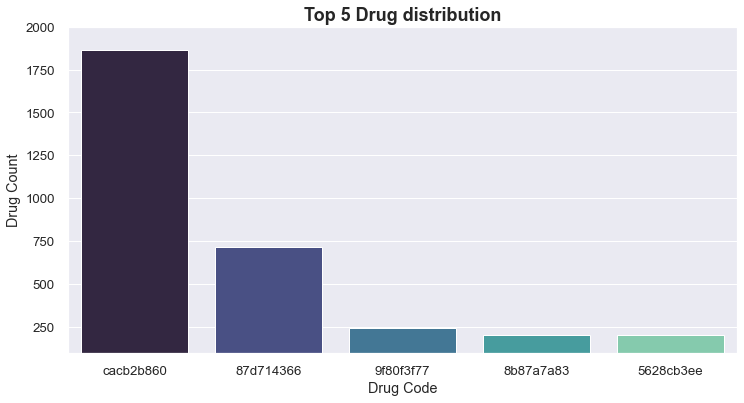

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(x= 'drug',order = top5_drugs['drug'].value_counts().index[0:5], data= top5_drugs, palette='mako')
plt.title('Top 5 Drug distribution', fontsize=18, weight='bold')
plt.xlabel('Drug Code')
plt.ylabel('Drug Count')
plt.ylim([100, 2000])
plt.show();

-----------------------------------------------

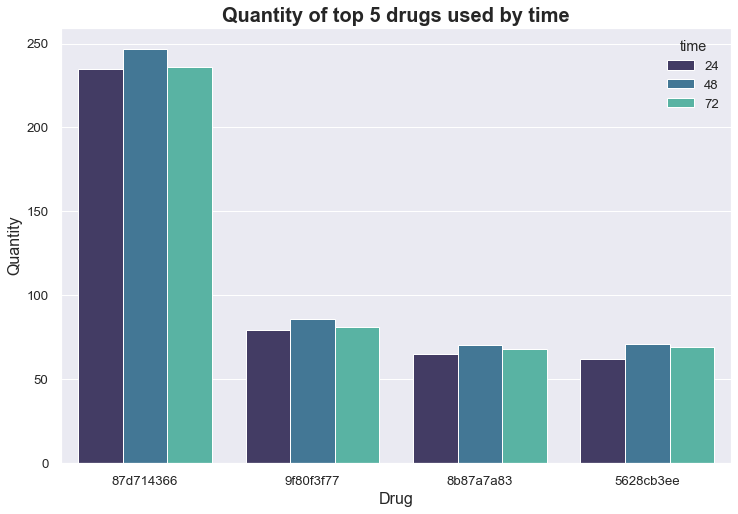

In [19]:
data_comdroga = top5_drugs.query('treatment == "com_droga"')
data_drugs = data_comdroga['drug'].value_counts().index[:5]
data_comdroga_5 = top5_drugs.query('drug in @data_drugs')

plt.figure(figsize = (12,8))
sns.countplot(x = 'drug', data = data_comdroga_5, palette = 'mako', order=data_drugs, hue = 'time')
plt.xlabel('Drug', fontsize = 16)
plt.ylabel('Quantity', fontsize = 16)
plt.title('Quantity of top 5 drugs used by time', fontsize = 20, weight ='bold')
plt.show();

### Exploring the Genes columns

In [20]:
#Found the size of the feature 'g0'
data['g0'].nunique()

14367

In [21]:
#filter the column 'g-0' and display only the values above 0.
data_g0_filtered = data[data['g0'] > 0]
data_g0_filtered.head()

,id,treatment,time,dosage,drug,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,g37,g38,g39,g40,g41,g42,g43,g44,g45,g46,g47,g48,g49,g50,g51,g52,g53,g54,g55,g56,g57,g58,g59,g60,g61,g62,g63,g64,g65,g66,g67,g68,g69,g70,g71,g72,g73,g74,g75,g76,g77,g78,g79,g80,g81,g82,g83,g84,g85,g86,g87,g88,g89,g90,g91,g92,g93,g94,g95,g96,g97,g98,g99,g100,g101,g102,g103,g104,g105,g106,g107,g108,g109,g110,g111,g112,g113,g114,g115,g116,g117,g118,g119,g120,g121,g122,g123,g124,g125,g126,g127,g128,g129,g130,g131,g132,g133,g134,g135,g136,g137,g138,g139,g140,g141,g142,g143,g144,g145,g146,g147,g148,g149,g150,g151,g152,g153,g154,g155,g156,g157,g158,g159,g160,g161,g162,g163,g164,g165,g166,g167,g168,g169,g170,g171,g172,g173,g174,g175,g176,g177,g178,g179,g180,g181,g182,g183,g184,g185,g186,g187,g188,g189,g190,g191,g192,g193,g194,g195,g196,g197,g198,g199,g200,g201,g202,g203,g204,g205,g206,g207,g208,g209,g210,g211,g212,g213,g214,g215,g216,g217,g218,g219,g220,g221,g222,g223,g224,g225,g226,g227,g228,g229,g230,g231,g232,g233,g234,g235,g236,g237,g238,g239,g240,g241,g242,g243,g244,g245,g246,g247,g248,g249,g250,g251,g252,g253,g254,g255,g256,g257,g258,g259,g260,g261,g262,g263,g264,g265,g266,g267,g268,g269,g270,g271,g272,g273,g274,g275,g276,g277,g278,g279,g280,g281,g282,g283,g284,g285,g286,g287,g288,g289,g290,g291,g292,g293,g294,g295,g296,g297,g298,g299,g300,g301,g302,g303,g304,g305,g306,g307,g308,g309,g310,g311,g312,g313,g314,g315,g316,g317,g318,g319,g320,g321,g322,g323,g324,g325,g326,g327,g328,g329,g330,g331,g332,g333,g334,g335,g336,g337,g338,g339,g340,g341,g342,g343,g344,g345,g346,g347,g348,g349,g350,g351,g352,g353,g354,g355,g356,g357,g358,g359,g360,g361,g362,g363,g364,g365,g366,g367,g368,g369,g370,g371,g372,g373,g374,g375,g376,g377,g378,g379,g380,g381,g382,g383,g384,g385,g386,g387,g388,g389,g390,g391,g392,g393,g394,g395,g396,g397,g398,g399,g400,g401,g402,g403,g404,g405,g406,g407,g408,g409,g410,g411,g412,g413,g414,g415,g416,g417,g418,g419,g420,g421,g422,g423,g424,g425,g426,g427,g428,g429,g430,g431,g432,g433,g434,g435,g436,g437,g438,g439,g440,g441,g442,g443,g444,g445,g446,g447,g448,g449,g450,g451,g452,g453,g454,g455,g456,g457,g458,g459,g460,g461,g462,g463,g464,g465,g466,g467,g468,g469,g470,g471,g472,g473,g474,g475,g476,g477,g478,g479,g480,g481,g482,g483,g484,g485,g486,g487,g488,g489,g490,g491,g492,g493,g494,g495,g496,g497,g498,g499,g500,g501,g502,g503,g504,g505,g506,g507,g508,g509,g510,g511,g512,g513,g514,g515,g516,g517,g518,g519,g520,g521,g522,g523,g524,g525,g526,g527,g528,g529,g530,g531,g532,g533,g534,g535,g536,g537,g538,g539,g540,g541,g542,g543,g544,g545,g546,g547,g548,g549,g550,g551,g552,g553,g554,g555,g556,g557,g558,g559,g560,g561,g562,g563,g564,g565,g566,g567,g568,g569,g570,g571,g572,g573,g574,g575,g576,g577,g578,g579,g580,g581,g582,g583,g584,g585,g586,g587,g588,g589,g590,g591,g592,g593,g594,g595,g596,g597,g598,g599,g600,g601,g602,g603,g604,g605,g606,g607,g608,g609,g610,g611,g612,g613,g614,g615,g616,g617,g618,g619,g620,g621,g622,g623,g624,g625,g626,g627,g628,g629,g630,g631,g632,g633,g634,g635,g636,g637,g638,g639,g640,g641,g642,g643,g644,g645,g646,g647,g648,g649,g650,g651,g652,g653,g654,g655,g656,g657,g658,g659,g660,g661,g662,g663,g664,g665,g666,g667,g668,g669,g670,g671,g672,g673,g674,g675,g676,g677,g678,g679,g680,g681,g682,g683,g684,g685,g686,g687,g688,g689,g690,g691,g692,g693,g694,g695,g696,g697,g698,g699,g700,g701,g702,g703,g704,g705,g706,g707,g708,g709,g710,g711,g712,g713,g714,g715,g716,g717,g718,g719,g720,g721,g722,g723,g724,g725,g726,g727,g728,g729,g730,g731,g732,g733,g734,g735,g736,g737,g738,g739,g740,g741,g742,g743,g744,g745,g746,g747,g748,g749,g750,g751,g752,g753,g754,g755,g756,g757,g758,g759,g760,g761,g762,g763,g764,g765,g766,g767,g768,g769,g770,g771,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24,c25,c26,c27,c28,c29,c30,c31,c32,c33,c34,c35,c36,c37,c38,c39,c40,c41,c42,c43,c44,c45,c46,c47,c48,c49,c50,c51,c52,c53,c54,c55,c56,c

In [22]:
print('The minimum value of "g0" is: ', data['g0'].min())
print('The maximun value of "g0" is: ', data['g0'].max())

The minimum value of "g0" is:  -5.513
The maximun value of "g0" is:  10.0


### Looking for statistic information of the variable "Gene"

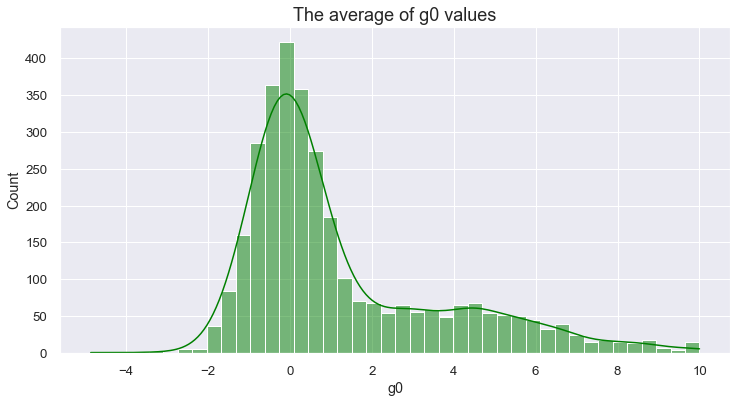

In [23]:
plt.figure(figsize=(12,6))
sns.histplot(data= top5_drugs, x='g0', kde=True, color='green')
plt.title('The average of g0 values', fontsize=18)
plt.show();

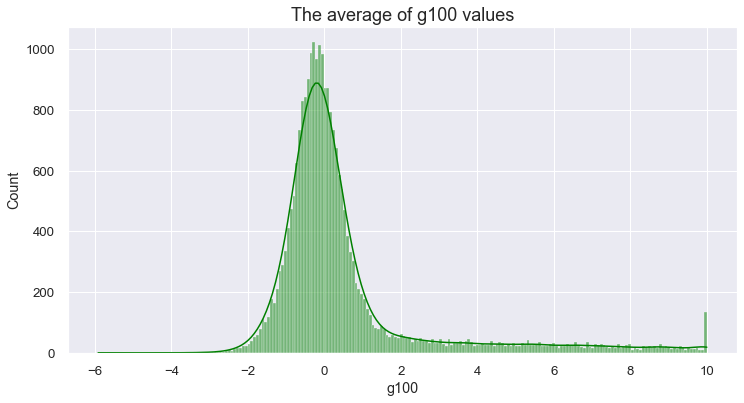

In [24]:
plt.figure(figsize=(12,6))
sns.histplot(data= data, x='g100', kde=True, color='green')
plt.title('The average of g100 values', fontsize=18)
plt.show();

In [25]:
data.describe()

,time,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,g37,g38,g39,g40,g41,g42,g43,g44,g45,g46,g47,g48,g49,g50,g51,g52,g53,g54,g55,g56,g57,g58,g59,g60,g61,g62,g63,g64,g65,g66,g67,g68,g69,g70,g71,g72,g73,g74,g75,g76,g77,g78,g79,g80,g81,g82,g83,g84,g85,g86,g87,g88,g89,g90,g91,g92,g93,g94,g95,g96,g97,g98,g99,g100,g101,g102,g103,g104,g105,g106,g107,g108,g109,g110,g111,g112,g113,g114,g115,g116,g117,g118,g119,g120,g121,g122,g123,g124,g125,g126,g127,g128,g129,g130,g131,g132,g133,g134,g135,g136,g137,g138,g139,g140,g141,g142,g143,g144,g145,g146,g147,g148,g149,g150,g151,g152,g153,g154,g155,g156,g157,g158,g159,g160,g161,g162,g163,g164,g165,g166,g167,g168,g169,g170,g171,g172,g173,g174,g175,g176,g177,g178,g179,g180,g181,g182,g183,g184,g185,g186,g187,g188,g189,g190,g191,g192,g193,g194,g195,g196,g197,g198,g199,g200,g201,g202,g203,g204,g205,g206,g207,g208,g209,g210,g211,g212,g213,g214,g215,g216,g217,g218,g219,g220,g221,g222,g223,g224,g225,g226,g227,g228,g229,g230,g231,g232,g233,g234,g235,g236,g237,g238,g239,g240,g241,g242,g243,g244,g245,g246,g247,g248,g249,g250,g251,g252,g253,g254,g255,g256,g257,g258,g259,g260,g261,g262,g263,g264,g265,g266,g267,g268,g269,g270,g271,g272,g273,g274,g275,g276,g277,g278,g279,g280,g281,g282,g283,g284,g285,g286,g287,g288,g289,g290,g291,g292,g293,g294,g295,g296,g297,g298,g299,g300,g301,g302,g303,g304,g305,g306,g307,g308,g309,g310,g311,g312,g313,g314,g315,g316,g317,g318,g319,g320,g321,g322,g323,g324,g325,g326,g327,g328,g329,g330,g331,g332,g333,g334,g335,g336,g337,g338,g339,g340,g341,g342,g343,g344,g345,g346,g347,g348,g349,g350,g351,g352,g353,g354,g355,g356,g357,g358,g359,g360,g361,g362,g363,g364,g365,g366,g367,g368,g369,g370,g371,g372,g373,g374,g375,g376,g377,g378,g379,g380,g381,g382,g383,g384,g385,g386,g387,g388,g389,g390,g391,g392,g393,g394,g395,g396,g397,g398,g399,g400,g401,g402,g403,g404,g405,g406,g407,g408,g409,g410,g411,g412,g413,g414,g415,g416,g417,g418,g419,g420,g421,g422,g423,g424,g425,g426,g427,g428,g429,g430,g431,g432,g433,g434,g435,g436,g437,g438,g439,g440,g441,g442,g443,g444,g445,g446,g447,g448,g449,g450,g451,g452,g453,g454,g455,g456,g457,g458,g459,g460,g461,g462,g463,g464,g465,g466,g467,g468,g469,g470,g471,g472,g473,g474,g475,g476,g477,g478,g479,g480,g481,g482,g483,g484,g485,g486,g487,g488,g489,g490,g491,g492,g493,g494,g495,g496,g497,g498,g499,g500,g501,g502,g503,g504,g505,g506,g507,g508,g509,g510,g511,g512,g513,g514,g515,g516,g517,g518,g519,g520,g521,g522,g523,g524,g525,g526,g527,g528,g529,g530,g531,g532,g533,g534,g535,g536,g537,g538,g539,g540,g541,g542,g543,g544,g545,g546,g547,g548,g549,g550,g551,g552,g553,g554,g555,g556,g557,g558,g559,g560,g561,g562,g563,g564,g565,g566,g567,g568,g569,g570,g571,g572,g573,g574,g575,g576,g577,g578,g579,g580,g581,g582,g583,g584,g585,g586,g587,g588,g589,g590,g591,g592,g593,g594,g595,g596,g597,g598,g599,g600,g601,g602,g603,g604,g605,g606,g607,g608,g609,g610,g611,g612,g613,g614,g615,g616,g617,g618,g619,g620,g621,g622,g623,g624,g625,g626,g627,g628,g629,g630,g631,g632,g633,g634,g635,g636,g637,g638,g639,g640,g641,g642,g643,g644,g645,g646,g647,g648,g649,g650,g651,g652,g653,g654,g655,g656,g657,g658,g659,g660,g661,g662,g663,g664,g665,g666,g667,g668,g669,g670,g671,g672,g673,g674,g675,g676,g677,g678,g679,g680,g681,g682,g683,g684,g685,g686,g687,g688,g689,g690,g691,g692,g693,g694,g695,g696,g697,g698,g699,g700,g701,g702,g703,g704,g705,g706,g707,g708,g709,g710,g711,g712,g713,g714,g715,g716,g717,g718,g719,g720,g721,g722,g723,g724,g725,g726,g727,g728,g729,g730,g731,g732,g733,g734,g735,g736,g737,g738,g739,g740,g741,g742,g743,g744,g745,g746,g747,g748,g749,g750,g751,g752,g753,g754,g755,g756,g757,g758,g759,g760,g761,g762,g763,g764,g765,g766,g767,g768,g769,g770,g771,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24,c25,c26,c27,c28,c29,c30,c31,c32,c33,c34,c35,c36,c37,c38,c39,c40,c41,c42,c43,c44,c45,c46,c47,c48,c49,c50,c51,c52,c53,c54,c55,c56,c57,c58,c59,c60,c61,c62,c6

In [26]:
#Looking for the statistic data of the 'g' features (in total we have 771) by transpose matrix
df_g = data.loc[:,'g0':'g771'].describe().T
df_g

,count,mean,std,min,25%,50%,75%,max
g0,23814.0,0.248366,1.393399,-5.513,-0.473075,-0.00885,0.525700,10.000
g1,23814.0,-0.095684,0.812363,-5.737,-0.562200,-0.04660,0.403075,5.039
g2,23814.0,0.152253,1.035731,-9.104,-0.437750,0.07520,0.663925,8.257
g3,23814.0,0.081971,0.950012,-5.998,-0.429575,0.00805,0.463400,10.000
g4,23814.0,0.057347,1.032091,-6.369,-0.470925,-0.02690,0.465375,10.000
...,...,...,...,...,...,...,...,...
g767,23814.0,-0.076251,1.115477,-10.000,-0.506200,0.00990,0.511175,6.317
g768,23814.0,0.134162,0.951264,-4.269,-0.353100,0.00540,0.409075,10.000
g769,23814.0,-0.128018,1.230636,-10.000,-0.544600,0.00060,0.498500,5.911
g770,23814.0,-0.219210,1.326193,-10.000,-0.554400,0.02870,0.496400,10.000


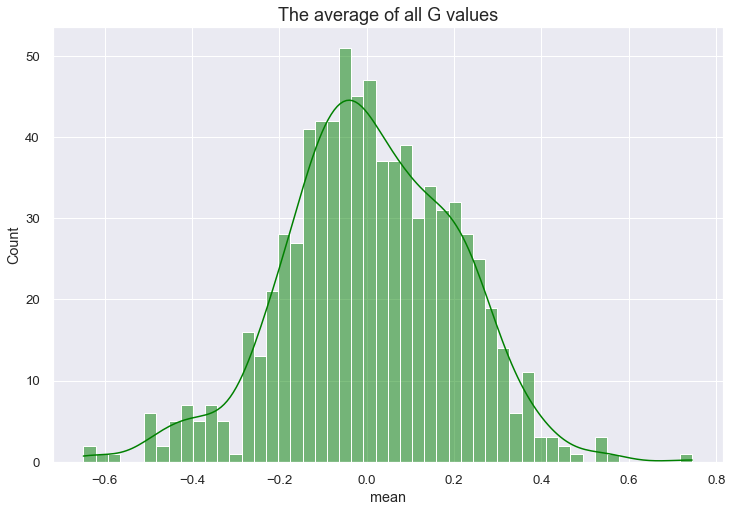

In [27]:
plt.figure(figsize=(12,8))
sns.histplot(data= df_g, x='mean', kde=True, bins=50, color='green')
plt.title('The average of all G values', fontsize=18)
plt.show();

## Plot the max and min values of Gs

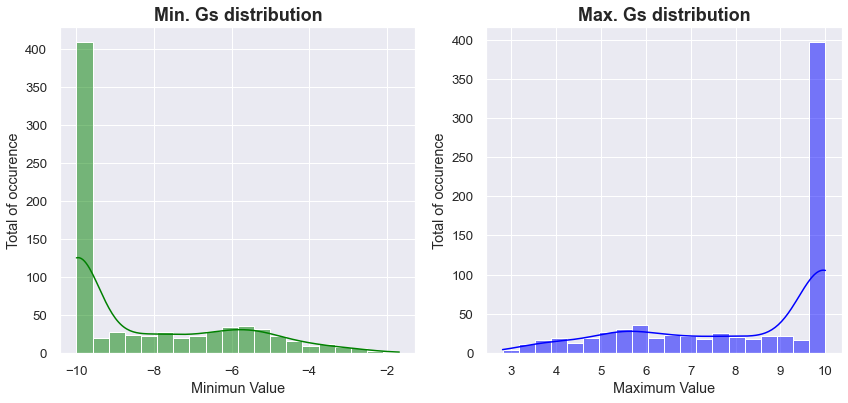

In [28]:
fig = plt.figure(figsize=(14,6))

ax1 = plt.subplot2grid((1,2),(0,0))
sns.histplot(x='min', data=df_g, kde=True, bins=20,color='green')
ax1.set_ylabel('Total of occurence')
ax1.set_xlabel('Minimun Value')
plt.title('Min. Gs distribution', fontsize=18, weight='bold')

#first row sec col
ax1 = plt.subplot2grid((1,2),(0,1))
sns.histplot(x='max', data=df_g, kde=True, bins=20,color='blue')
ax1.set_ylabel('Total of occurence')
ax1.set_xlabel('Maximum Value')
plt.title('Max. Gs distribution',weight='bold', fontsize=18)
plt.show()

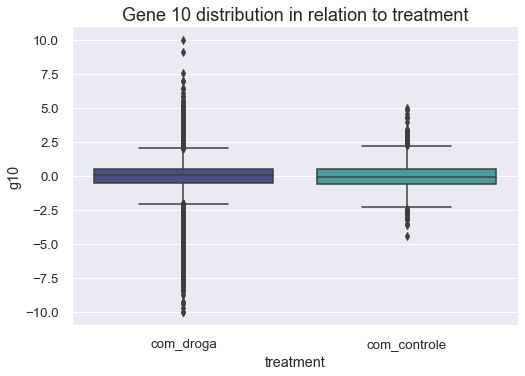

In [29]:
plt.figsize=(12,8)
sns.boxplot(x='treatment', y= 'g10', data=data, palette='mako')
plt.title('Gene 10 distribution in relation to treatment', fontsize=18);

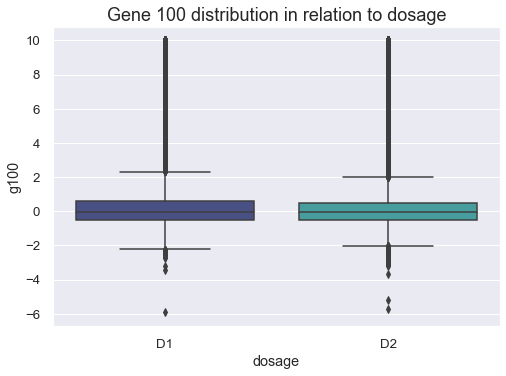

In [30]:
plt.figsize=(12,8)
sns.boxplot(x='dosage', y= 'g100', data=data, palette='mako')
plt.title('Gene 100 distribution in relation to dosage', fontsize=18);

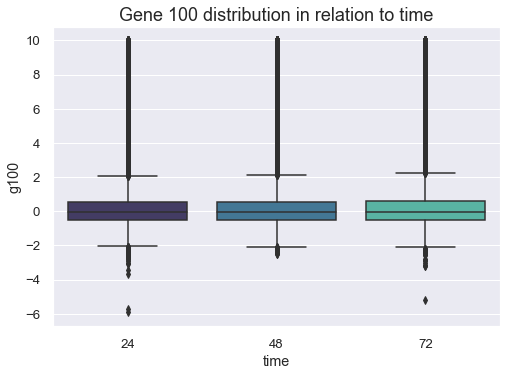

In [31]:
plt.figsize=(12,8)
sns.boxplot(x='time',y= 'g100', data=data, palette='mako')
plt.title('Gene 100 distribution in relation to time', fontsize=18);

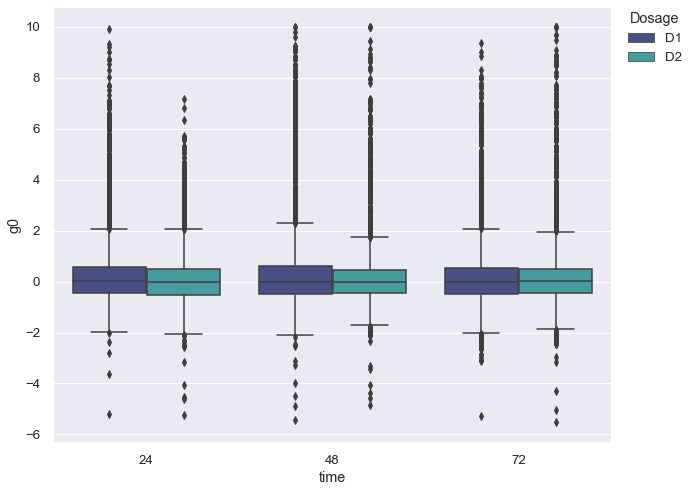

In [32]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(y='g0', hue='dosage', x = 'time', data=data, palette='mako')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Dosage')
plt.show()

### Plot statistic numbers for variable "C"

Each 'c' is cell type or represents an cell line,coming from cancer (pathogenic), or health cells.

In [33]:
#Looking for the statistic data of the '6' features (in total we have 99) by transpose matrix
df_c = data.loc[:,'c0':'c99'].describe().T
df_c

,count,mean,std,min,25%,50%,75%,max
c0,23814.0,-0.355156,1.752565,-10.0,-0.549300,-0.00900,0.448975,3.365
c1,23814.0,-0.455359,2.004962,-10.0,-0.538425,0.00980,0.476875,3.915
c2,23814.0,-0.480542,2.039346,-10.0,-0.550375,-0.00400,0.460575,2.970
c3,23814.0,-0.377666,1.554583,-10.0,-0.601975,-0.03905,0.413100,2.408
c4,23814.0,-0.493552,2.091888,-10.0,-0.559975,0.01140,0.470300,4.555
...,...,...,...,...,...,...,...,...
c95,23814.0,-0.353726,1.629291,-10.0,-0.567975,-0.01025,0.444750,2.814
c96,23814.0,-0.463485,2.059725,-10.0,-0.552575,-0.00125,0.465225,3.505
c97,23814.0,-0.378241,1.703615,-10.0,-0.561000,-0.00680,0.446400,2.924
c98,23814.0,-0.470252,1.834828,-10.0,-0.592600,0.01400,0.461275,3.111


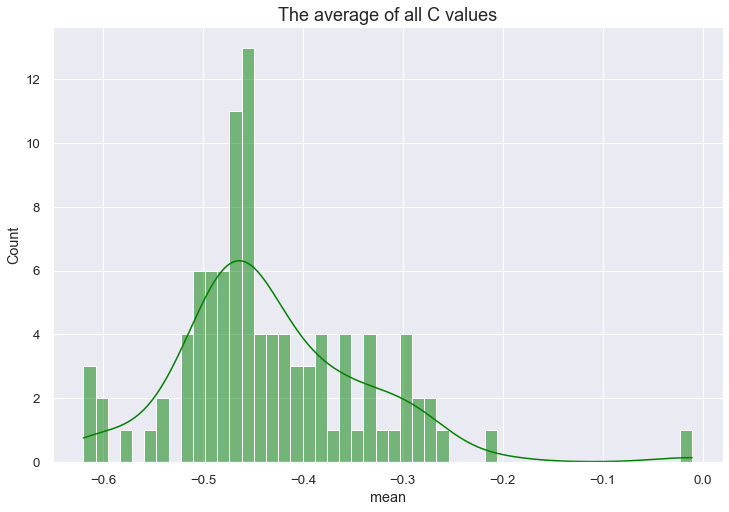

In [34]:
plt.figure(figsize=(12,8))
sns.histplot(data= df_c, x='mean', kde=True, bins=50, color='green')
plt.title('The average of all C values', fontsize=18)
plt.show();

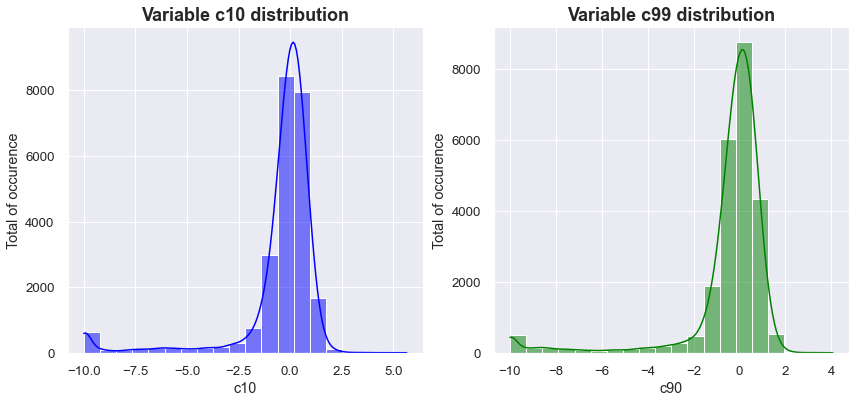

In [35]:
fig = plt.figure(figsize=(14,6))

ax1 = plt.subplot2grid((1,2),(0,0))
sns.histplot(x='c10', data=data, kde=True, bins=20,color='blue')
ax1.set_ylabel('Total of occurence')
plt.title('Variable c10 distribution', fontsize=18, weight='bold')

#first row sec col
ax1 = plt.subplot2grid((1,2),(0,1))
sns.histplot(x='c90', data=data, kde=True, bins=20, color='green')
ax1.set_ylabel('Total of occurence')
plt.title('Variable c99 distribution',weight='bold', fontsize=18)
plt.show()

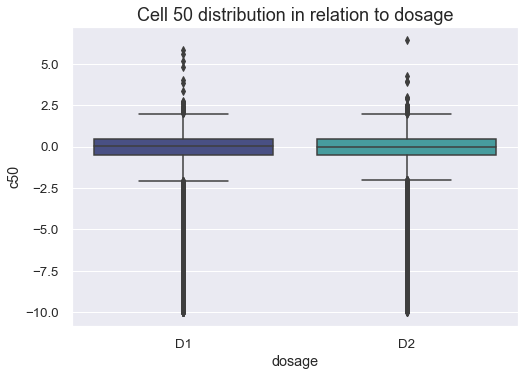

In [36]:
plt.figsize=(12,8)
sns.boxplot(x='dosage',y= 'c50', data=data, palette='mako')
plt.title('Cell 50 distribution in relation to dosage', fontsize=18);

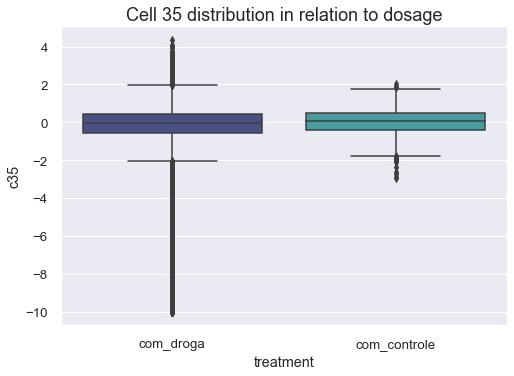

In [37]:
plt.figsize=(12,8)
sns.boxplot(x='treatment',y= 'c35', data=data, palette='mako')
plt.title('Cell 35 distribution in relation to dosage', fontsize=18);

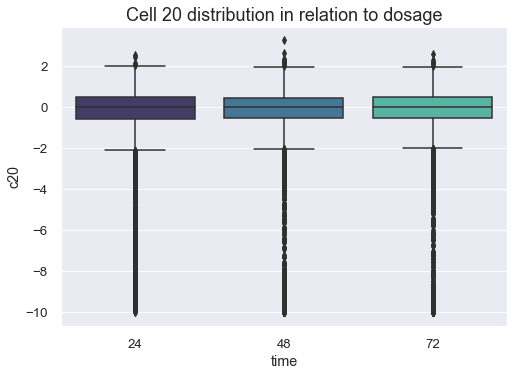

In [38]:
plt.figsize=(12,8)
sns.boxplot(x='time',y= 'c20', data=data, palette='mako')
plt.title('Cell 20 distribution in relation to dosage', fontsize=18)
plt.show();

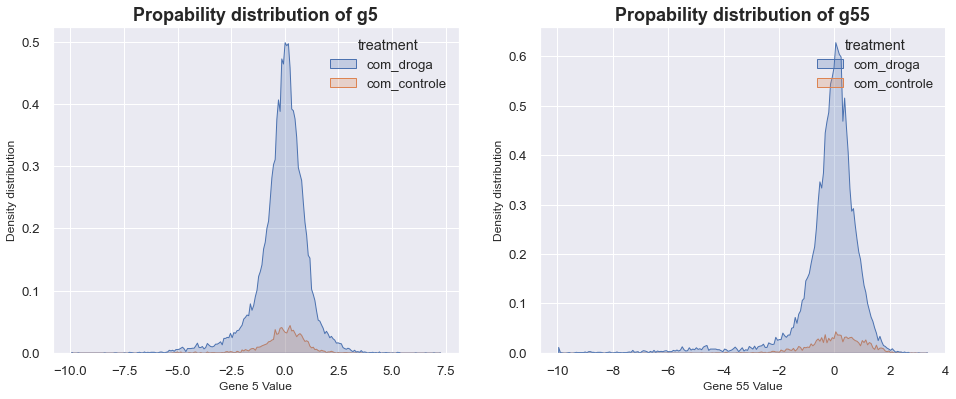

In [39]:
#Figure size
fig = plt.subplots(figsize=(16, 6)) 

#graphic configuration
ax1 = plt.subplot2grid((1,2),(0,0))
ax = sns.histplot(data = data, x = 'g5', hue = 'treatment',element ='poly', stat = 'density')
ax.set_title('Propability distribution of g5', size=18, weight='bold')
ax.set_xlabel('Gene 5 Value', size=12)
ax.set_ylabel('Density distribution', size=12)


#Graphic configuration
ax1 = plt.subplot2grid((1,2),(0,1))
ax = sns.histplot(data = data, x = 'g55', hue = 'treatment', element ='poly', stat = 'density',)
ax.set_title('Propability distribution of g55', size=18, weight='bold')
ax.set_xlabel('Gene 55 Value', size=12)
ax.set_ylabel('Density distribution', size=12)
plt.show();

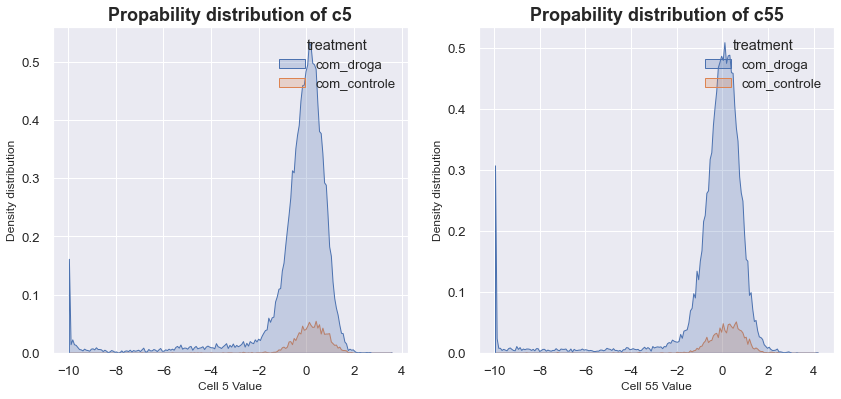

In [40]:
#Figure size
fig = plt.subplots(figsize=(14, 6)) 

#Graphic configuration
ax1 = plt.subplot2grid((1,2),(0,0))
ax = sns.histplot(data = data, x = 'c5', hue = 'treatment', element ='poly', stat = 'density')
ax.set_title('Propability distribution of c5', size=18, weight='bold')
ax.set_xlabel('Cell 5 Value', size=12)
ax.set_ylabel('Density distribution', size=12)

#Graphic configuration
ax1 = plt.subplot2grid((1,2),(0,1))
ax = sns.histplot(data = data, x = 'c55', hue = 'treatment', element ='poly', stat = 'density')
ax.set_title('Propability distribution of c55', size=18, weight='bold')
ax.set_xlabel('Cell 55 Value', size=12)
ax.set_ylabel('Density distribution', size=12)
plt.show();

In [41]:
from scipy import stats

#Normal test, if p > 0.05 is normal
stats.normaltest(data['g5']) 

NormaltestResult(statistic=6327.238830733795, pvalue=0.0)

The __Kruskal-Wallis H test__ (sometimes also called the "one-way ANOVA on ranks") is a rank-based nonparametric test that can be used to determine if there are statistically significant differences between two or more groups of an independent variable on a continuous or ordinal dependent variable.

In [42]:
stats.kruskal(data.query('treatment == "com_controle"')['g5'], data.query('treatment == "com_droga"')['g5']) 

KruskalResult(statistic=5.362336499483278, pvalue=0.02057618801365606)

## Investigate correlations, causality and relationships between genes

In [43]:
pd.crosstab(data['dosage'], data['time'])

time,24,48,72
dosage,,,
D1,3886,4354,3907
D2,3886,3896,3885


### Correlation using Crosstab

In [44]:
#Seems to be very well balanced
pd.crosstab([data['dosage'], data['time']], data['treatment'])

treatment    com_controle  com_droga
dosage time                         
D1     24             301       3585
       48             343       4011
       72             307       3600
D2     24             305       3581
       48             305       3591
       72             305       3580

In [45]:
pd.crosstab([data['dosage'], data['time']], data['treatment'], normalize='index')

treatment    com_controle  com_droga
dosage time                         
D1     24        0.077458   0.922542
       48        0.078778   0.921222
       72        0.078577   0.921423
D2     24        0.078487   0.921513
       48        0.078285   0.921715
       72        0.078507   0.921493

### Same table of above using Groupby

In [46]:
#groupby, count and sum 
total_count = data.groupby(['dosage', 'time', 'treatment']).count()['id'].sum(level=[0, 1])
                                                                                 
#Execute the division of it
(data.groupby(['dosage', 'time', 'treatment']).count()['id'] / total_count).unstack()                                                                                

treatment    com_controle  com_droga
dosage time                         
D1     24        0.077458   0.922542
       48        0.078778   0.921222
       72        0.078577   0.921423
D2     24        0.078487   0.921513
       48        0.078285   0.921715
       72        0.078507   0.921493

In [47]:
#Now using lambda to Normalize the crosstab by row
pd.crosstab(data.time, data.treatment).apply(lambda r: r/r.sum(), axis=1)

treatment,com_controle,com_droga
time,,
24,0.077972,0.922028
48,0.078545,0.921455
72,0.078542,0.921458


In [48]:
#Now using lambda to Normalize the crosstab by columns
pd.crosstab(data.time, data.treatment).apply(lambda c: c/c.sum(), axis=0)

treatment,com_controle,com_droga
time,,
24,0.324759,0.326499
48,0.347267,0.346364
72,0.327974,0.327137


--------------------------

In [49]:
#Crosstab of mean values of gene 'g0'
pd.crosstab([data['dosage'], data['time']], data['treatment'], values=data['g0'], aggfunc='mean')

treatment    com_controle  com_droga
dosage time                         
D1     24       -0.251760   0.367996
       48       -0.122773   0.412469
       72       -0.295271   0.286250
D2     24        0.010754   0.115253
       48        0.013174   0.214480
       72        0.070250   0.253439

In [50]:
## Melt the dataframe
data.melt(id_vars=['dosage', 'time', 'drug'], value_vars=['treatment'])

,dosage,time,drug,variable,value
0,D1,24,b68db1d53,treatment,com_droga
1,D1,72,df89a8e5a,treatment,com_droga
2,D1,48,18bb41b2c,treatment,com_droga
3,D1,48,8c7f86626,treatment,com_droga
4,D2,72,7cbed3131,treatment,com_droga
...,...,...,...,...,...
23809,D2,24,df1d0a5a1,treatment,com_droga
23810,D2,24,ecf3b6b74,treatment,com_droga
23811,D2,48,cacb2b860,treatment,com_controle
23812,D1,24,8b87a7a83,treatment,com_droga


## Aggfunc
The function, default numpy.mean, or list of functions If list of functions passed, the resulting pivot table will have hierarchical columns whose top level are the function names (inferred from the function objects themselves).

In [52]:
import numpy as np
#calculate multiple statistics at the same time
data.pivot_table(index='dosage', columns='treatment', values='g500', aggfunc=[np.sum, np.mean, np.std], fill_value=0)

sum                    mean                    std  \
treatment com_controle  com_droga com_controle com_droga com_controle   
dosage                                                                  
D1            128.6195  4205.8828     0.135247  0.375659     0.853864   
D2            440.6532  1914.9099     0.481588  0.178098     0.853452   

                     
treatment com_droga  
dosage               
D1         1.680143  
D2         1.253413

In [53]:
#calculate multiple statistics at the same time
data.pivot_table(index='time', columns='treatment', values='g200', aggfunc=[np.sum, np.mean, np.std], fill_value=0)

sum                    mean                    std  \
treatment com_controle  com_droga com_controle com_droga com_controle   
time                                                                    
24            250.9930  1206.8165     0.414180  0.168409     0.955521   
48            210.8882   997.5849     0.325445  0.131227     0.999202   
72            123.2735   101.8583     0.201427  0.014186     0.800337   

                     
treatment com_droga  
time                 
24         1.186534  
48         1.024989  
72         0.831549

In [54]:
# Sum aggregation
pd.crosstab([data['dosage'], data['time']], data['treatment'], values=data['g300'], aggfunc='sum')

treatment    com_controle  com_droga
dosage time                         
D1     24         -4.8750   850.5908
       48        -12.0879   840.7671
       72         78.6552  -126.9865
D2     24       -198.9250 -1158.0325
       48       -217.4580 -1348.6507
       72       -159.0937 -2068.7462

In [55]:
# Mean aggregation
pd.crosstab([data['dosage'], data['time']], data['treatment'], values=data['g55'], aggfunc='mean')

treatment    com_controle  com_droga
dosage time                         
D1     24        0.390229  -0.155332
       48        0.289227  -0.313297
       72        0.102968  -0.429691
D2     24       -0.587472  -0.232155
       48       -0.179456  -0.130467
       72        0.117299  -0.115381

----------------

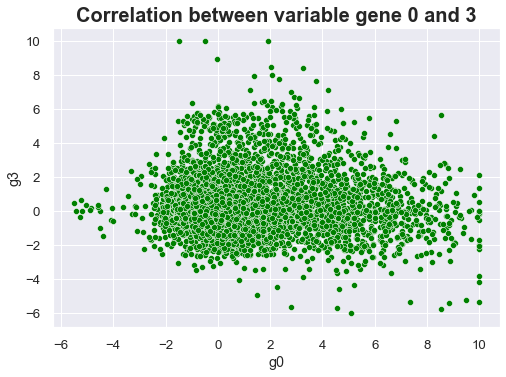

In [56]:
plt.figsize=(12,8)
sns.scatterplot(x='g0', y='g3', data=data, color='green')
plt.title('Correlation between variable gene 0 and 3', size=20, weight='bold');

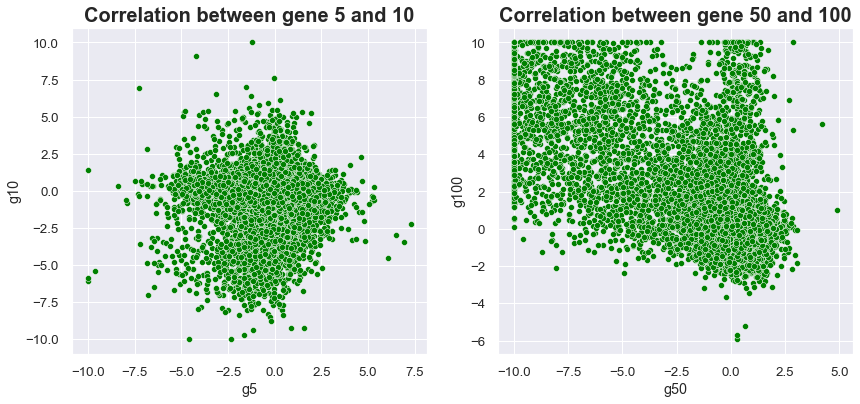

In [57]:
fig = plt.figure(figsize=(14,6))

ax1 = plt.subplot2grid((1,2),(0,0))
sns.scatterplot(x='g5', y='g10', data=data, color='green')
plt.title('Correlation between gene 5 and 10', size=20, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.scatterplot(x='g50', y='g100', data=data, color='green')
plt.title('Correlation between gene 50 and 100', size=20, weight='bold')
plt.show();

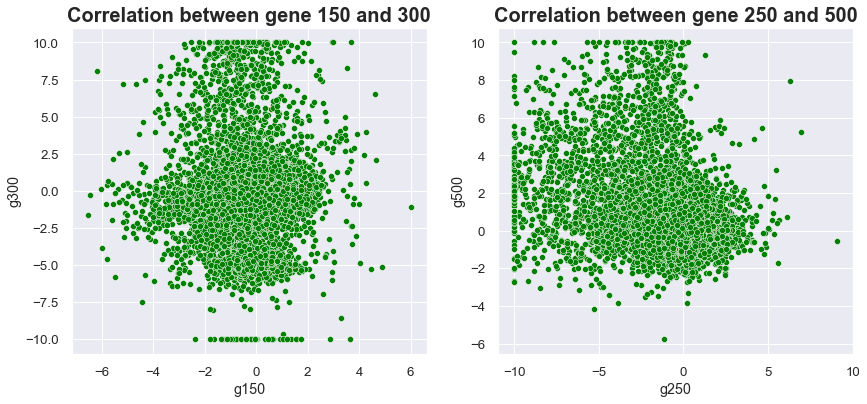

In [58]:
fig = plt.figure(figsize=(14,6))

ax1 = plt.subplot2grid((1,2),(0,0))
sns.scatterplot(x='g150', y='g300', data=data, color='green')
plt.title('Correlation between gene 150 and 300', size=20, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.scatterplot(x='g250', y='g500', data=data, color='green')
plt.title('Correlation between gene 250 and 500', size=20, weight='bold')
plt.show();

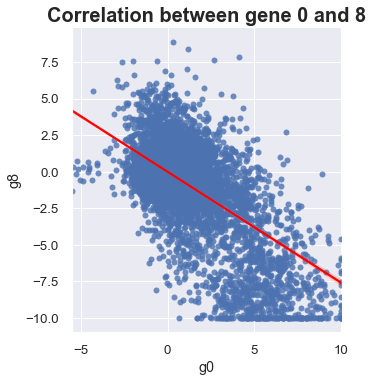

In [59]:
sns.lmplot(data=data, x='g0', y='g8', line_kws={'color': 'red'})
plt.title('Correlation between gene 0 and 8', size=20, weight='bold')
plt.show();

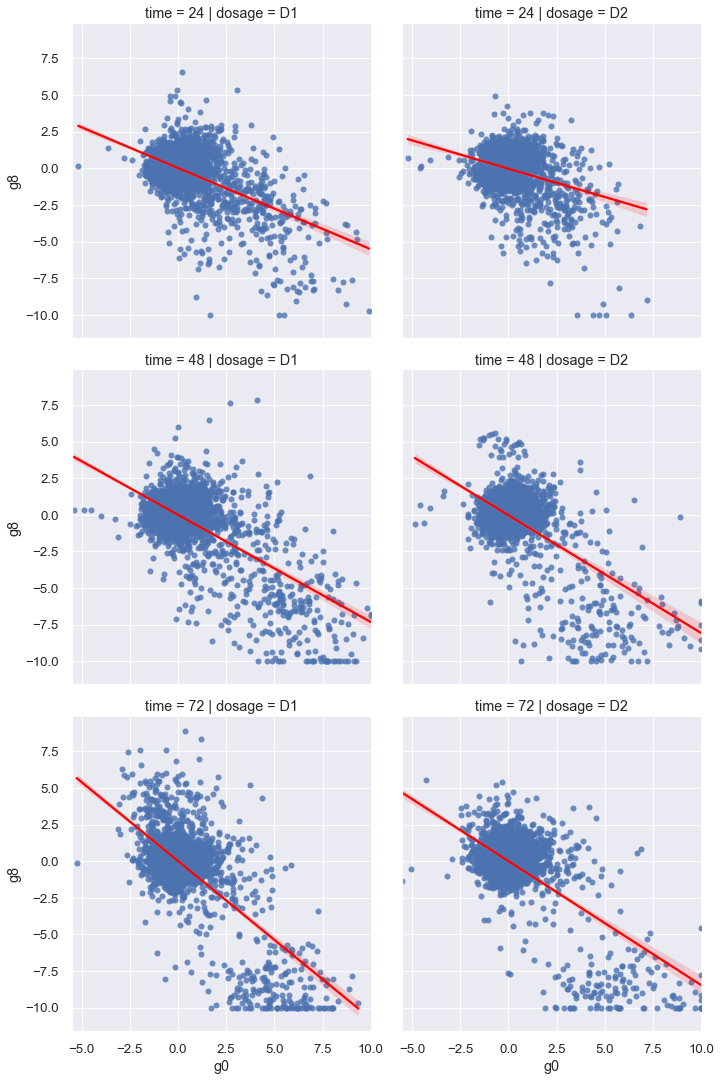

In [60]:
sns.lmplot(data=data, x='g0', y='g8', line_kws={'color': 'red'}, col='dosage', row='time');

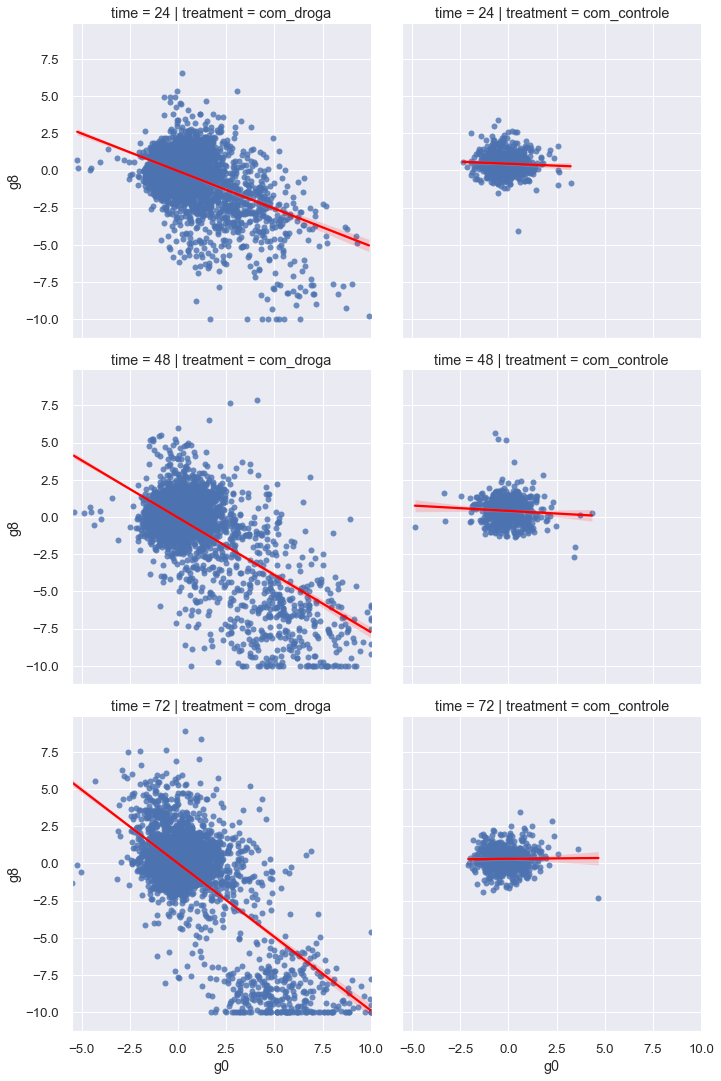

In [61]:
sns.lmplot(data=data, x='g0', y='g8', line_kws={'color': 'red'}, col='treatment', row='time');

In [62]:
# Compute the correlation matrix
gene_corr = data.loc[:,'g0':'g50'].corr()
gene_corr 

,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,g37,g38,g39,g40,g41,g42,g43,g44,g45,g46,g47,g48,g49,g50
g0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,-0.547606,0.219762,-0.199453,0.472223,-0.346179,-0.201323,-0.513026,-0.433536,-0.002073,-0.074622,-0.468599,0.052445,0.022269,-0.076298,-0.337522,-0.235191,-0.422814,0.148432,-0.471092,-0.296871,-0.528327,0.558136,-0.133229,-0.155987,-0.120247,0.327593,-0.147800,-0.591868,0.602623,0.450769,-0.432426,-0.499815,-0.203828,0.021582,-0.023423,-0.119687,0.530238,0.039827,0.238235,0.310583,-0.560201
g1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,-0.009051,0.161274,0.037178,-0.009256,0.002632,-0.070193,-0.063414,-0.000944,-0.023748,-0.034714,-0.131031,0.196596,-0.061441,0.090620,-0.004299,-0.032600,-0.019435,0.015661,-0.098907,-0.091071,-0.053331,-0.049514,0.187382,-0.091232,0.045417,0.044373,-0.077671,-0.005265,-0.042213,0.050546,0.000655,-0.110238,0.133896,0.161186,-0.092498,0.031993,0.097674,-0.012420,0.029064,-0.106349,-0.028870
g2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,-0.105050,0.011198,-0.063501,0.082011,-0.082204,-0.059607,-0.137811,-0.085491,0.053335,0.028813,-0.061160,-0.129131,-0.007426,-0.034230,-0.128312,-0.067363,-0.126554,0.036984,-0.129481,-0.017941,-0.152288,0.172191,-0.100086,-0.033010,-0.015481,0.001098,-0.020374,-0.157977,0.169464,0.144449,-0.080201,-0.109646,-0.121433,-0.086435,0.021241,-0.036105,0.142712,-0.009575,0.039119,0.052003,-0.140002
g3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,-0.074101,0.181024,0.030539,0.192727,0.128792,-0.045688,0.033974,-0.070920,0.237669,0.112392,0.027867,-0.167263,0.197013,-0.049480,-0.113336,0.175615,0.111355,0.007168,-0.022381,-0.128269,-0.042827,0.098416,-0.091962,-0.083806,0.184985,-0.070933,-0.317859,-0.228039,0.084346,0.054827,0.114685,-0.047136,-0.010941,-0.168398,-0.001770,0.065444,0.082046,0.297146,0.173796,0.072970,-0.233491
g4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,-0.458021,0.116467,-0.207078,0.210440,-0.307280,0.019531,-0.275700,-0.422889,-0.012207,-0.088152,-0.311798,0.286106,-0.055368,-0.113396,-0.120743,-0.233682,-0.340708,0.070292,-0.360274,-0.225461,-0.402256,0.324362,0.091731,-0.052787,-0.073490,0.195062,-0.124394,-0.277002,0.285256,0.300517,-0.309149,-0.373390,0.071462,0.185361,-0.105936,-0.033695,0.355833,-0.060724,0.006138,0.114748,-0.315675
g5,-0.165478,-0.151590,0.018516,0.042231,-0.057449,1.000000,0.083620,0.102345,0.073885,0.126561,0.038743,-0.171709,-0.000393,-0.112423,0.073760,0.037763,0.221227,0.033641,0.041073,0.134431,0.136226,0.042455,0.095901,-0.000709,0.120697,0.082212,0.058257,-0.106304,0.137596,0.171353,0.136856,-0.133521,0.025275,-0.070144,0.058305,-0.108843,-0.034259,0.142193,-0.189048,-0.097622,0.208673,0.206885,0.120727,-0.031065,-0.047988,0.090507,-0.176810,0.023328,0.039471,-0.127953,0.128877
g6,0.238348,-0.122541,0.015190,-0.043177,0.206405,0.083620,1.000000,0.030544,-0.212292,-0.134739,-0.264575,-0.064363,-0.041731,0.110102,-0.126069,-0.107593,-0.109543,-0.182960,-0.058387,0.070343,0.049195,0.244205,-0.076039,-0.063008,0.034160,-0.002408,-0.194962,-0.051850,-0.032510,0.091318,-0.113642,0.179365,0.065968,-0.059884,-0.114453,0.102340,0.106371,-0.038967,0.045983,0.073990,-0.040374,-0.006081,-0.170005,0.137326,0.053565,-0.003568,0.094446,-0.045317,-0.074863,0.104435,0.026171
g7,-0.374451,0.144537,-0.144205,-0.175692,-0.032748,0.102345,0.030544,1.000000,0.278085,0.288780,0.382325,-0.184966,0.166101,-0.380687,0.266334,0.141999,0.372104,0.185269,-0.061020,0.121534,0.231938,0.321506,-0.043685,0.143473,0.458273,0.123891,0.262002,-0.126174,0.287440,0.222967,0.419395,-0.453566,0.492635,-0.036159,0.014755,-0.199236,0.313535,0.584749,-0.579429,-0.39801

# Correlation matrix of the first 50 genes
__Correlation near -1 and 1 are very high correlated, when near zero does not affect the others.__
It does not mean they have causalidade over each other

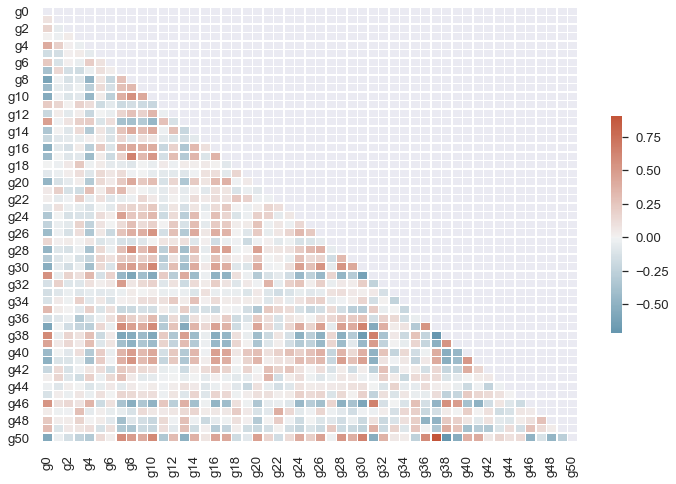

In [63]:
import numpy as np

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(gene_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(gene_corr , mask=mask, cmap=cmap, center=0,
            square=False, linewidths=.5, cbar_kws={"shrink": .5});

## CELL CORRELATIONS

In [64]:
cell_corr = data.loc[:,'c0':'c99'].corr()
cell_corr 

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24,c25,c26,c27,c28,c29,c30,c31,c32,c33,c34,c35,c36,c37,c38,c39,c40,c41,c42,c43,c44,c45,c46,c47,c48,c49,c50,c51,c52,c53,c54,c55,c56,c57,c58,c59,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
c0,1.000000,0.827336,0.848472,0.798830,0.840695,0.844469,0.811946,0.793171,0.842977,0.759971,0.850533,0.832837,0.808033,0.836838,0.823716,0.827496,0.788947,0.831436,0.797051,0.796719,0.818420,0.823586,0.717807,0.805687,0.836447,0.837448,0.815484,0.840909,0.824231,0.807981,0.818558,0.855363,0.831066,0.820803,0.828947,0.829693,0.839386,0.774960,0.806885,0.849807,0.847857,0.848941,0.847747,0.827377,0.847072,0.824247,0.816332,0.819386,0.778280,0.792811,0.797689,0.846866,0.839177,0.840661,0.846889,0.836756,0.805811,0.830347,0.758164,0.818259,0.839605,0.846656,0.851796,0.797634,0.820904,0.806811,0.845954,0.825661,0.833020,0.812924,0.814969,0.837019,0.845174,0.847267,0.723442,0.845666,0.761470,0.791360,0.840550,0.812687,0.839668,0.825544,0.844675,0.852891,0.836344,0.859314,0.817635,0.787650,0.838987,0.827124,0.835217,0.832529,0.799196,0.817657,0.846457,0.815499,0.845579,0.834513,0.800682,0.777426
c1,0.827336,1.000000,0.901416,0.808364,0.879258,0.869569,0.876924,0.793199,0.879892,0.812345,0.866297,0.884532,0.861089,0.880177,0.820911,0.857797,0.771984,0.843076,0.861134,0.820399,0.837626,0.852621,0.756086,0.812062,0.874647,0.829208,0.887230,0.853246,0.861559,0.789314,0.816042,0.889619,0.837788,0.866130,0.865169,0.840517,0.877007,0.779697,0.890506,0.835689,0.891745,0.870896,0.891842,0.869508,0.851121,0.858537,0.828145,0.854667,0.853745,0.845159,0.839386,0.874612,0.888692,0.836161,0.868874,0.890182,0.794093,0.871744,0.760323,0.859149,0.875778,0.823214,0.889565,0.868589,0.840502,0.856425,0.869802,0.886129,0.834581,0.814084,0.869416,0.826417,0.861290,0.851737,0.725885,0.884601,0.830345,0.846593,0.837897,0.844521,0.842983,0.885487,0.868565,0.870559,0.875755,0.874084,0.818480,0.793513,0.838070,0.811761,0.875405,0.839236,0.876519,0.868431,0.886750,0.803637,0.871383,0.866084,0.815952,0.781510
c2,0.848472,0.901416,1.000000,0.830759,0.909991,0.882794,0.898819,0.812980,0.896087,0.821522,0.892033,0.904968,0.879638,0.910497,0.841421,0.884464,0.800587,0.879281,0.881011,0.824149,0.853648,0.878793,0.761439,0.832908,0.887800,0.859023,0.899897,0.879307,0.876141,0.824171,0.851934,0.906052,0.850681,0.890263,0.880173,0.852595,0.887820,0.799599,0.905449,0.866557,0.909829,0.889876,0.909086,0.886977,0.880717,0.875814,0.854217,0.874174,0.863002,0.853704,0.848724,0.894937,0.905652,0.859660,0.897013,0.911787,0.816180,0.889924,0.782554,0.872575,0.897347,0.848344,0.898224,0.887169,0.853978,0.874032,0.894848,0.892008,0.857836,0.838323,0.877652,0.849427,0.891245,0.890797,0.738358,0.892939,0.832679,0.858314,0.866675,0.858469,0.871477,0.899199,0.892636,0.887700,0.896144,0.891606,0.844756,0.800533,0.853413,0.835940,0.902964,0.872660,0.883866,0.885419,0.906584,0.837420,0.898270,0.874869,0.839640,0.802032
c3,0.798830,0.808364,0.830759,1.000000,0.831523,0.829550,0.805506,0.752940,0.830369,0.765626,0.818465,0.828218,0.803839,0.822104,0.788432,0.818493,0.758345,0.804018,0.806834,0.781198,0.791121,0.816744,0.742109,0.792355,0.828853,0.829277,0.807726,0.816247,0.818892,0.790481,0.796522,0.830602,0.796222,0.804081,0.811296,0.805880,0.820989,0.747433,0.813351,0.827805,0.833075,0.821351,0.838118,0.821934,0.813087,0.806219,0.808859,0.812784,0.804207,0.818632,0.821138,0.830602,0.834034,0.802481,0.843849,0.830486,0.783336,0.837207,0.753113,0.798009,0.810208,0.797311,0.835446,0.817884,0.810944,0.788175,0.835219,0.813661,0.805820,0.794756,0.782965,0.806491,0.840010,0.824398,0.702892,0.823897,0.765937,0.802952,0.800673,0.803913,0.813930,0.835707,0.819130,0.813694,0.834414,0.819223,0.808987,0.772220,0.811936,0.796889,0.825342,0.813555,0.812200,0.803603,0.830301,0.799760,0.822001,0.814889,0.779998,0.7688

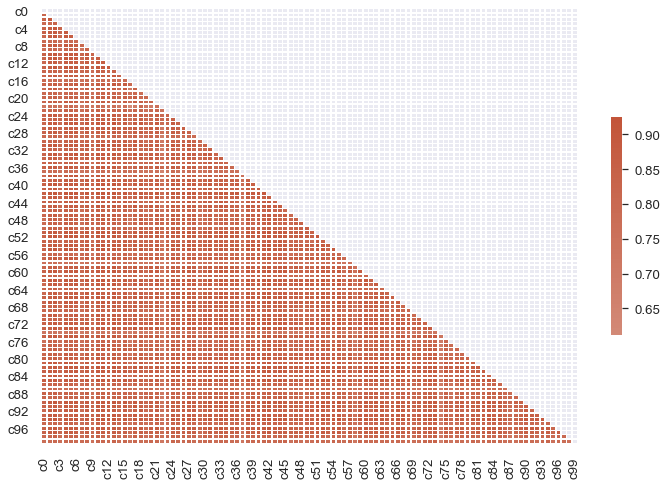

In [65]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(cell_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cell_corr , mask=mask, cmap=cmap, center=0,
            square=False, linewidths=.5, cbar_kws={'shrink': .5});

# Challenges

## Calculate and analyse the correlation between Genes and Cells

In [70]:
correlated_features = data.iloc[:, 715:805].columns.tolist()

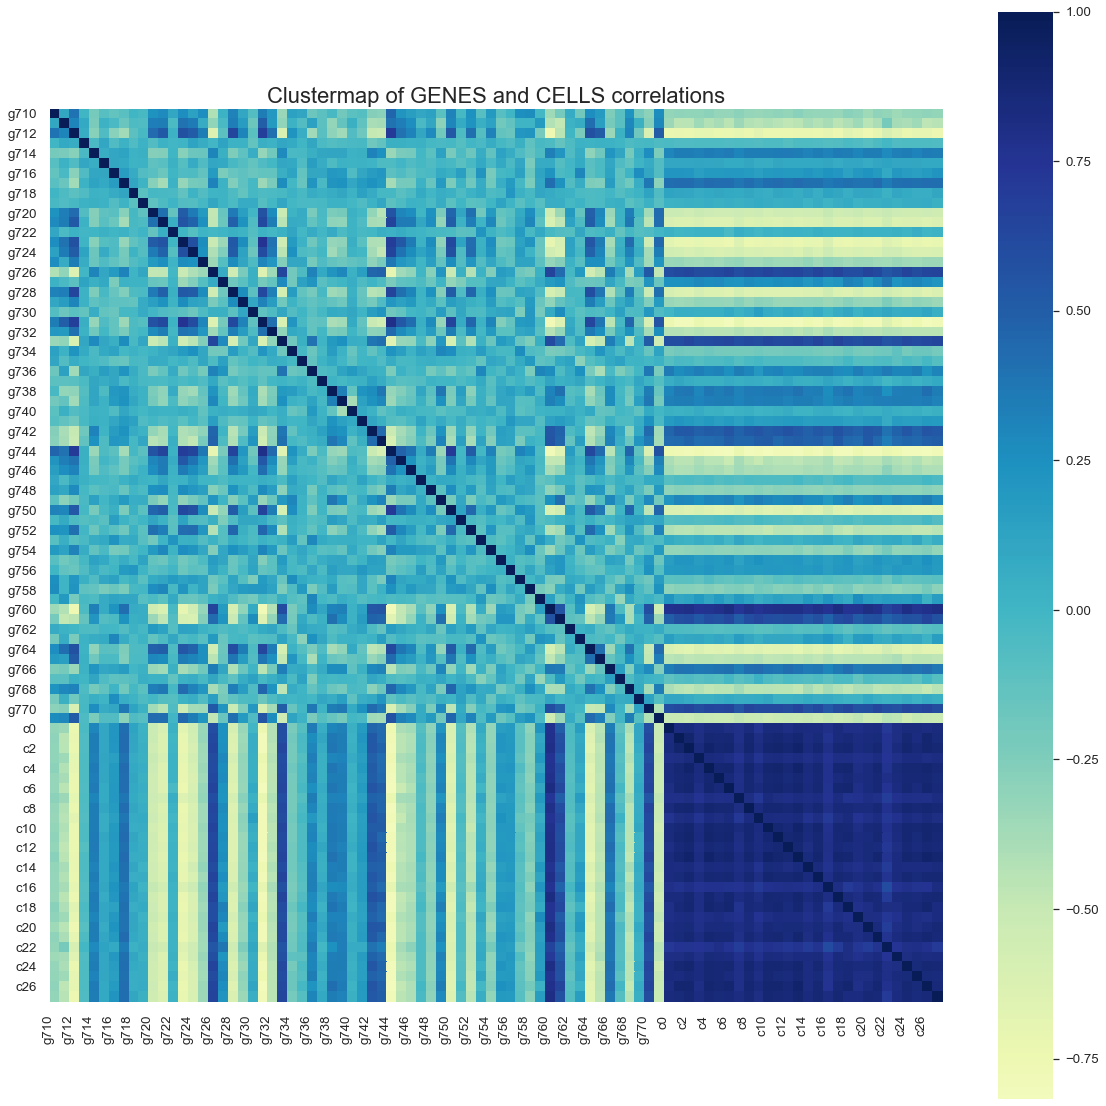

In [71]:
corr_matrix = data[correlated_features].corr()

plt.subplots(figsize=(20,20))
ax = sns.heatmap(
    corr_matrix, center=0,
    cmap='YlGnBu',
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

ax.set_title('Clustermap of GENES and CELLS correlations', fontsize= 22)

plt.show();